In [1]:
import pandas as pd
df=pd.read_csv("Titanic Disaster Dataset.csv")   #<1,3,
df.head()

,PassengerId,PClass,Gender,Sibling,Embarked,Survived
0,1,3,male,1,S,0
1,2,1,female,1,C,1
2,3,3,female,0,S,1
3,4,1,female,1,S,1
4,5,3,male,0,S,0


In [2]:
df=df[df.Sibling<4]
df=df[df.Sibling>=0]
df=df[df.Embarked!=None]
df=df[df.Gender!=None]
df=df[df.PClass<4]
df=df[df.PClass>=1]
df=df[df.Survived!=None]
df

,PassengerId,PClass,Gender,Sibling,Embarked,Survived
0,1,3,male,1,S,0
1,2,1,female,1,C,1
2,3,3,female,0,S,1
3,4,1,female,1,S,1
4,5,3,male,0,S,0
...,...,...,...,...,...,...
1304,1305,3,male,0,S,0
1305,1306,1,female,0,C,1
1306,1307,3,male,0,S,0
1307,1308,3,male,0,S,0


In [3]:
Input=df.drop("Survived",axis="columns")
Target=df["Survived"]

In [4]:
Input

,PassengerId,PClass,Gender,Sibling,Embarked
0,1,3,male,1,S
1,2,1,female,1,C
2,3,3,female,0,S
3,4,1,female,1,S
4,5,3,male,0,S
...,...,...,...,...,...
1304,1305,3,male,0,S
1305,1306,1,female,0,C
1306,1307,3,male,0,S
1307,1308,3,male,0,S


In [5]:
Target

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1272, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_gender=LabelEncoder()

In [8]:
Input["new_Gender"]=le_gender.fit_transform(Input["Gender"])
Input.head()

,PassengerId,PClass,Gender,Sibling,Embarked,new_Gender
0,1,3,male,1,S,1
1,2,1,female,1,C,0
2,3,3,female,0,S,0
3,4,1,female,1,S,0
4,5,3,male,0,S,1


In [9]:
dumies=pd.get_dummies(Input.Embarked)

In [10]:
dumies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [11]:
merged=pd.concat([Input,dumies],axis="columns")

In [12]:
merged

,PassengerId,PClass,Gender,Sibling,Embarked,new_Gender,C,Q,S
0,1,3,male,1,S,1,0,0,1
1,2,1,female,1,C,0,1,0,0
2,3,3,female,0,S,0,0,0,1
3,4,1,female,1,S,0,0,0,1
4,5,3,male,0,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,S,1,0,0,1
1305,1306,1,female,0,C,0,1,0,0
1306,1307,3,male,0,S,1,0,0,1
1307,1308,3,male,0,S,1,0,0,1


In [13]:
final=merged.drop(["PassengerId","Gender","Embarked","S"],axis="columns")
final.head()

,PClass,Sibling,new_Gender,C,Q
0,3,1,1,0,0
1,1,1,0,1,0
2,3,0,0,0,0
3,1,1,0,0,0
4,3,0,1,0,0


In [14]:
from sklearn.linear_model import LogisticRegression
model0=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
from sklearn.svm import SVC
model2=SVC()
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model6=LinearDiscriminantAnalysis()
from sklearn.linear_model import SGDClassifier
model7=SGDClassifier()
from sklearn.neural_network import MLPClassifier
model8=MLPClassifier()
from sklearn.naive_bayes import BernoulliNB
model9=BernoulliNB()

In [15]:
from sklearn.model_selection import KFold

In [16]:
kf=KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [17]:
def get_train(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [18]:
scoresLR=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresLR.append(get_train(model0, x_train, x_test, y_train, y_test))


scoresLR

[0.8046875,
 0.796875,
 0.8267716535433071,
 0.7637795275590551,
 0.7480314960629921,
 0.8031496062992126,
 0.8346456692913385,
 1.0,
 1.0,
 1.0]

In [19]:
scoresRF=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresRF.append(get_train(model1, x_train, x_test, y_train, y_test))


scoresRF

[0.8046875,
 0.8046875,
 0.8346456692913385,
 0.7874015748031497,
 0.7637795275590551,
 0.8031496062992126,
 0.8346456692913385,
 1.0,
 1.0,
 0.9921259842519685]

In [20]:
scoresSVM=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresSVM.append(get_train(model2, x_train, x_test, y_train, y_test))


scoresSVM

[0.8046875,
 0.8046875,
 0.8346456692913385,
 0.7795275590551181,
 0.7637795275590551,
 0.8031496062992126,
 0.8346456692913385,
 1.0,
 1.0,
 1.0]

In [21]:
scoresDT=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresDT.append(get_train(model3, x_train, x_test, y_train, y_test))


scoresDT

[0.8046875,
 0.8046875,
 0.8346456692913385,
 0.7874015748031497,
 0.7637795275590551,
 0.8031496062992126,
 0.8346456692913385,
 0.9921259842519685,
 1.0,
 0.9921259842519685]

In [22]:
scoresKN=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresKN.append(get_train(model4, x_train, x_test, y_train, y_test))


scoresKN

[0.7421875,
 0.796875,
 0.8188976377952756,
 0.7795275590551181,
 0.7637795275590551,
 0.8031496062992126,
 0.8267716535433071,
 0.9448818897637795,
 0.905511811023622,
 0.9212598425196851]

In [23]:
scoresNB=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresNB.append(get_train(model5, x_train, x_test, y_train, y_test))


scoresNB

[0.8046875,
 0.7890625,
 0.8267716535433071,
 0.7637795275590551,
 0.7480314960629921,
 0.8031496062992126,
 0.8346456692913385,
 0.9921259842519685,
 1.0,
 1.0]

In [24]:
scoresDA=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresDA.append(get_train(model6, x_train, x_test, y_train, y_test))


scoresDA

[0.8046875,
 0.796875,
 0.8267716535433071,
 0.7637795275590551,
 0.7480314960629921,
 0.8031496062992126,
 0.8346456692913385,
 1.0,
 1.0,
 1.0]

In [25]:
scoresSGD=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresSGD.append(get_train(model7, x_train, x_test, y_train, y_test))


scoresSGD

[0.8046875,
 0.796875,
 0.8267716535433071,
 0.7637795275590551,
 0.7480314960629921,
 0.8031496062992126,
 0.8346456692913385,
 0.7952755905511811,
 1.0,
 0.9921259842519685]

In [26]:
scoresMLP=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresMLP.append(get_train(model8, x_train, x_test, y_train, y_test))


scoresMLP

C:\Users\Haseeb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Haseeb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Haseeb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Haseeb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

[0.8046875,
 0.8046875,
 0.8346456692913385,
 0.7795275590551181,
 0.7637795275590551,
 0.8031496062992126,
 0.8346456692913385,
 1.0,
 1.0,
 0.9921259842519685]

In [27]:
scoresBNB=[]

for train_index,test_index in kf.split(final):
    x_train, x_test= final.values[train_index], final.values[test_index]
    y_train, y_test= Target.values[train_index], Target.values[test_index]
    scoresBNB.append(get_train(model9, x_train, x_test, y_train, y_test))


scoresBNB

[0.8046875,
 0.796875,
 0.8267716535433071,
 0.7637795275590551,
 0.7480314960629921,
 0.8031496062992126,
 0.8346456692913385,
 1.0,
 1.0,
 1.0]

In [28]:
def get_Avg_score(Score):
    avg=0
    for i in range(10):
        avg=avg+Score[i]
    s=avg/10
    return s

In [29]:
Avg_Score_kfv=[]

In [30]:
avg_score_LR=get_Avg_score(scoresLR)
Avg_Score_kfv.append(avg_score_LR)
avg_score_LR

0.8577940452755906

In [31]:
avg_score_RF=get_Avg_score(scoresRF)
Avg_Score_kfv.append(avg_score_RF)
Avg_Score_kfv[1]

0.8625123031496063

In [32]:
avg_score_SVM=get_Avg_score(scoresSVM)
Avg_Score_kfv.append(avg_score_SVM)
Avg_Score_kfv[2]

0.8625123031496063

In [33]:
avg_score_DT=get_Avg_score(scoresDT)
Avg_Score_kfv.append(avg_score_DT)
Avg_Score_kfv[3]

0.8617249015748032

In [34]:
avg_score_KN=get_Avg_score(scoresKN)
Avg_Score_kfv.append(avg_score_KN)
Avg_Score_kfv[4]

0.8302842027559055

In [35]:
avg_score_NB=get_Avg_score(scoresNB)
Avg_Score_kfv.append(avg_score_NB)
Avg_Score_kfv[5]

0.8562253937007874

In [36]:
avg_score_DA=get_Avg_score(scoresDA)
Avg_Score_kfv.append(avg_score_DA)
Avg_Score_kfv[6]

0.8577940452755906

In [37]:
avg_score_SGD=get_Avg_score(scoresSGD)
Avg_Score_kfv.append(avg_score_SGD)
Avg_Score_kfv[7]

0.8365342027559055

In [38]:
avg_score_MLP=get_Avg_score(scoresMLP)
Avg_Score_kfv.append(avg_score_MLP)
Avg_Score_kfv[8]

0.8617249015748032

In [39]:
avg_score_BNB=get_Avg_score(scoresBNB)
Avg_Score_kfv.append(avg_score_BNB)
Avg_Score_kfv[9]

0.8577940452755906

In [40]:
Avg_Score_kfv

[0.8577940452755906,
 0.8625123031496063,
 0.8625123031496063,
 0.8617249015748032,
 0.8302842027559055,
 0.8562253937007874,
 0.8577940452755906,
 0.8365342027559055,
 0.8617249015748032,
 0.8577940452755906]

In [41]:
Models_collection=[]
Models_collection.append(model0)
Models_collection.append(model1)
Models_collection.append(model2)
Models_collection.append(model3)
Models_collection.append(model4)
Models_collection.append(model5)
Models_collection.append(model6)
Models_collection.append(model7)
Models_collection.append(model8)
Models_collection.append(model9)

In [42]:
Models_collection

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', 

In [43]:
def model_selection_ScoreBase(Score):
    i=0
    for j in range(len(Score)-1):
        if Score[i]<Score[j]:
            i=j
    return i

In [44]:
Best_kfv_model=model_selection_ScoreBase(Avg_Score_kfv)
Best_kfv_model

1

In [45]:
Models_collection[Best_kfv_model]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
Avg_Score_kfv[Best_kfv_model]

0.8625123031496063

In [47]:
predictLR=model0.predict(final)
predictRF=model1.predict(final)
predictSVM=model2.predict(final)
predictDT=model3.predict(final)
predictKN=model4.predict(final)
predictNB=model5.predict(final)
predictDA=model6.predict(final)
predictSGD=model7.predict(final)
predictMLP=model8.predict(final)
predictBNB=model9.predict(final)

In [48]:
Accuracy_Collection=[]

In [49]:
from sklearn.metrics import confusion_matrix
def get_stats(trueVal,predicted):
    cm=confusion_matrix(trueVal,predicted)
    print("Confusion Matrix of model")
    print(cm)
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sn
    plt.figure(figsize=(5,2.5))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    a=cm[0][0]
    b=cm[0][1]
    c=cm[1][0]
    d=cm[1][1]
    Baseline=(max(a+b,c+d))/(a+b+c+d)
    print("Model's baseline is:", Baseline)
    Acuracy=(a+d)/(a+b+c+d)
    Accuracy_Collection.append(Acuracy)
    print("Model's accuracy is:", Acuracy)
    Recall=(d)/(c+d)
    print("Model's recall is:", Recall)
    Precision=(d)/(b+d)
    print("Model's precision is:", Precision)
    f1=(2*Precision*Recall)/(Precision+Recall)
    print("Model's F1 is:", f1)

Confusion Matrix of model
[[711  73]
 [108 380]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8577044025157232
Model's recall is: 0.7786885245901639
Model's precision is: 0.8388520971302428
Model's F1 is: 0.8076514346439957


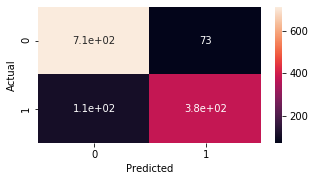

In [50]:
get_stats(Target,predictLR)

Confusion Matrix of model
[[721  63]
 [108 380]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8655660377358491
Model's recall is: 0.7786885245901639
Model's precision is: 0.8577878103837472
Model's F1 is: 0.8163265306122448


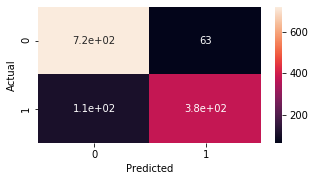

In [51]:
get_stats(Target,predictRF)

Confusion Matrix of model
[[718  66]
 [109 379]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8624213836477987
Model's recall is: 0.7766393442622951
Model's precision is: 0.851685393258427
Model's F1 is: 0.8124330117899251


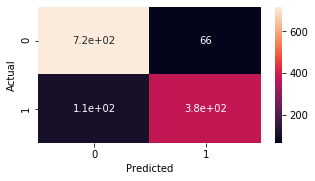

In [52]:
get_stats(Target,predictSVM)

Confusion Matrix of model
[[721  63]
 [108 380]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8655660377358491
Model's recall is: 0.7786885245901639
Model's precision is: 0.8577878103837472
Model's F1 is: 0.8163265306122448


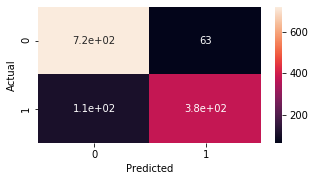

In [53]:
get_stats(Target,predictDT)

Confusion Matrix of model
[[717  67]
 [129 359]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8459119496855346
Model's recall is: 0.735655737704918
Model's precision is: 0.8427230046948356
Model's F1 is: 0.7855579868708972


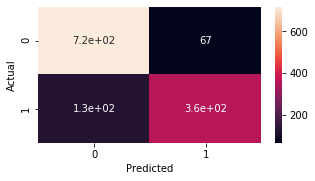

In [54]:
get_stats(Target,predictKN)

Confusion Matrix of model
[[709  75]
 [108 380]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8561320754716981
Model's recall is: 0.7786885245901639
Model's precision is: 0.8351648351648352
Model's F1 is: 0.8059384941675504


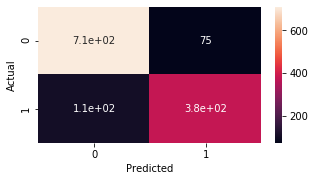

In [55]:
get_stats(Target,predictNB)

Confusion Matrix of model
[[711  73]
 [108 380]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8577044025157232
Model's recall is: 0.7786885245901639
Model's precision is: 0.8388520971302428
Model's F1 is: 0.8076514346439957


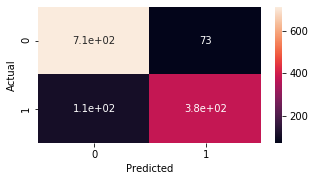

In [56]:
get_stats(Target,predictDA)

Confusion Matrix of model
[[721  63]
 [114 374]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8608490566037735
Model's recall is: 0.7663934426229508
Model's precision is: 0.8558352402745996
Model's F1 is: 0.8086486486486486


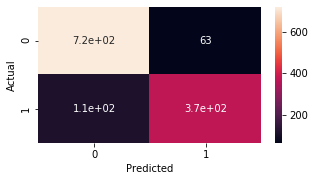

In [57]:
get_stats(Target,predictSGD)

Confusion Matrix of model
[[721  63]
 [110 378]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8639937106918238
Model's recall is: 0.7745901639344263
Model's precision is: 0.8571428571428571
Model's F1 is: 0.813778256189451


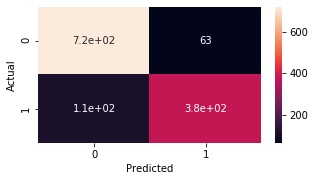

In [58]:
get_stats(Target,predictMLP)

Confusion Matrix of model
[[711  73]
 [108 380]]
Model's baseline is: 0.6163522012578616
Model's accuracy is: 0.8577044025157232
Model's recall is: 0.7786885245901639
Model's precision is: 0.8388520971302428
Model's F1 is: 0.8076514346439957


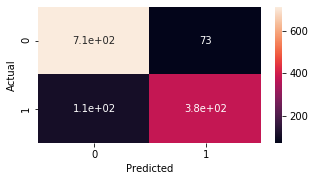

In [59]:
get_stats(Target,predictBNB)

In [60]:
Accuracy_Collection

[0.8577044025157232,
 0.8655660377358491,
 0.8624213836477987,
 0.8655660377358491,
 0.8459119496855346,
 0.8561320754716981,
 0.8577044025157232,
 0.8608490566037735,
 0.8639937106918238,
 0.8577044025157232]

In [61]:
def model_selection_AccuracyBase(Accuracy):
    i=0
    for j in range(len(Accuracy)-1):
        if Accuracy[i]<Accuracy[j]:
            i=j
    return i

In [62]:
Best_model=model_selection_AccuracyBase(Accuracy_Collection)
Best_model

1

In [63]:
Models_collection[Best_model]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
Models_collection[Best_model].fit(final,Target)
Models_collection[Best_model].score(final,Target)

0.8655660377358491

In [65]:
def predictions():
    PClass=input("Please enter the PClass (1,2,3):")
    if(int(PClass)<1 or int(PClass)>3):
        print("Wrong PClass entered.")
        predictions()
    Gender=input("Please enter gender (Male/Female):")
    if(Gender!="Male" and Gender!="Female" and Gender!="male" and Gender!="female"):
        print("Wrong Gender entered.")
        predictions()
    Siblings=input("Please enter number of Siblings (0,1,2,3):")
    if(int(Siblings)<0 or int(Siblings)>3):
        print("Wrong siblings number entered.")
        predictions()
    Embarked=input("Enter Embarked value (C,S,Q):")
    if(Embarked!='C' and Embarked!='S' and Embarked!='Q' and Embarked!='s' and Embarked!='c' and Embarked!='q'):
        print("Wrong Embarked value is entered.")
        predictions()
    if(Gender=="Male" or Gender=="male"):
        Gender=1
    else:
        Gender=0
    C=0
    Q=0
    if(Embarked=='S' or Embarked=='s'):
        C=0
        Q=0
    elif(Embarked=='C' or Embarked=='c'):
        C=1
        Q=0
    else:
        Q=1
        C=0
    PredictedVal=Models_collection[Best_model].predict([[PClass,Siblings,Gender,C,Q]])
    if(PredictedVal==1):
        print("The person Survived.")
    else:
        print("The person not Survived.")

In [66]:
def predictor(P,G,S,E):
    PClass=int(P)
    Gender=G
    Siblings=int(S)
    Embarked=E
    if(Gender=="Male" or Gender=="male"):
        Gender=1
    else:
        Gender=0
    C=0
    Q=0
    if(Embarked=='S' or Embarked=='s'):
        C=0
        Q=0
    elif(Embarked=='C' or Embarked=='c'):
        C=1
        Q=0
    else:
        Q=1
        C=0
    
    PredictedVal=Models_collection[Best_model].predict([[PClass,Siblings,Gender,C,Q]])
    return PredictedVal

In [67]:
from tkinter import *
from tkinter.ttk import *
window=Tk()
window.title("Titanic Disaster Predictor")
window.geometry('500x300')
lb1=Label(window,text="Select Values of attributes",font=("Times New Roman",14))
lb1.grid(column=0,row=0)
lb2=Label(window,text="PClass",font=("Times New Roman",12))
lb2.grid(column=2,row=2)
combo=Combobox(window)
combo['values']=(1,2,3)
combo.current(1)
combo.grid(column=2,row=3)
lb3=Label(window,text="Gender",font=("Times New Roman",12))
lb3.grid(column=2,row=4)
combo1=Combobox(window)
combo1['values']=("Male","Female")
combo1.current(1)
combo1.grid(column=2,row=5)
lb4=Label(window,text="Siblings",font=("Times New Roman",12))
lb4.grid(column=2,row=6)
combo2=Combobox(window)
combo2['values']=(0,1,2,3)
combo2.current(1)
combo2.grid(column=2,row=7)
lb4=Label(window,text="Embarked",font=("Times New Roman",12))
lb4.grid(column=2,row=8)
combo3=Combobox(window)
combo3['values']=('C','S','Q')
combo3.current(1)
combo3.grid(column=2,row=9)
lb=Label(window)
def clicked():
    global lb
    lb.destroy()
    p=combo.get()
    g=combo1.get()
    s=combo2.get()
    e=combo3.get()
    predict=predictor(p,g,s,e)
    if(predict==1):
        lb=Label(window,text="Hooray,Person Survived!",font=("Times New Roman",14))
        lb.grid(column=2,row=12)
    else:
        lb=Label(window,text="Alas,Person not Survived!",font=("Times New Roman",14))
        lb.grid(column=2,row=12)
btn=Button(window,text="Predict",command=clicked)
btn.grid(column=2,row=10)
window.mainloop()